# BLG-307 YAPAY ZEKA SİSTEMLERİ - PROJE ÖDEVİ 1

**Senaryo 1:** Güneş Paneli Yerleşiminde Optimum Eğim ve Yön

**Öğrencinin Adı:** ESRA
**Soyadı:** GÖGEBAKAN
**Okul Numarası:** 2212721001
**GitHub Repo Bağlantısı:** https://github.com/esra03-1/Gunes-Paneli-Yerlesimi_Genetik_Proje.git

--- GENETİK ALGORİTMA BAŞLATILDI ---
Popülasyon: 50, Nesil Sayısı: 100

Nesil 10: En İyi Puan = 419.61 | Eğim: 15.95, Yön: 87.34
Nesil 20: En İyi Puan = 420.92 | Eğim: 16.05, Yön: 87.59
Nesil 30: En İyi Puan = 425.40 | Eğim: 15.26, Yön: 89.28
Nesil 40: En İyi Puan = 427.33 | Eğim: 14.94, Yön: 90.00
Nesil 50: En İyi Puan = 427.33 | Eğim: 14.94, Yön: 90.00
Nesil 60: En İyi Puan = 427.33 | Eğim: 14.94, Yön: 90.00
Nesil 70: En İyi Puan = 427.49 | Eğim: 15.00, Yön: 90.00
Nesil 80: En İyi Puan = 427.49 | Eğim: 15.00, Yön: 90.00
Nesil 90: En İyi Puan = 427.49 | Eğim: 15.00, Yön: 90.00
Nesil 100: En İyi Puan = 427.49 | Eğim: 15.00, Yön: 90.00

--- OPTİMİZASYON TAMAMLANDI ---
En İyi Çözüm -> Eğim (x1): 15.00, Yön (x2): 90.00
Maksimum Enerji Verimi: 427.49


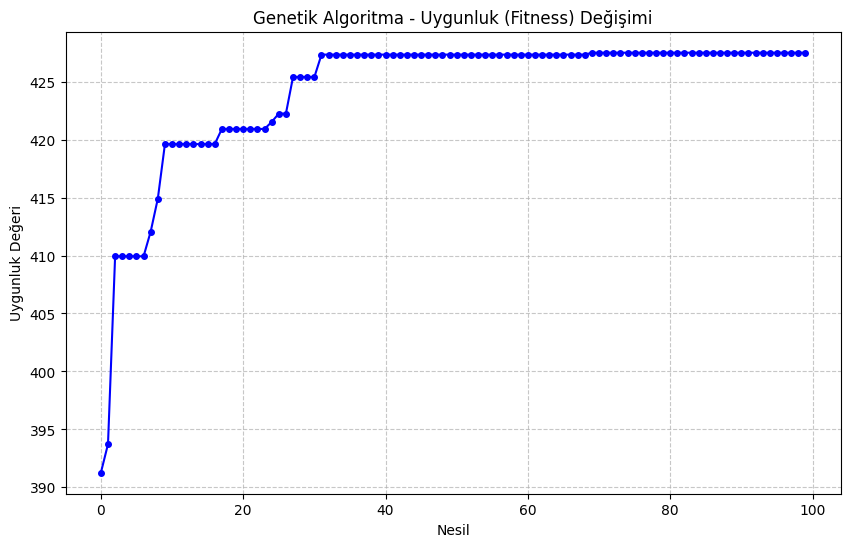

In [1]:
# =============================================================================
# ÖĞRENCİ BİLGİLERİ
# Adınız: [ADINI BURAYA YAZ]
# Soyadınız: [SOYADINI BURAYA YAZ]
# Okul Numaranız: [NUMARANI BURAYA YAZ]
# GitHub Repo Bağlantısı: https://github.com/kullanici_adi/genetik_optimizasyonu
# =============================================================================

import numpy as np
import random
import matplotlib.pyplot as plt

# --- 1. AYARLAR (Hocanın parametre yapısı) ---
POPULASYON_BOYUTU = 50      # Popülasyondaki birey sayısı
NESIL_SAYISI = 100          # Algoritmanın kaç tur döneceği
MUTASYON_IHTIMALI = 0.2     # Gen değişimi olasılığı
MUTASYON_BUYUKLUGU = 2.0    # Değişim miktarı
CEZA_KATSAYISI = 50         # İhlal başına düşülecek puan

# --- 2. SENARYO 1 TANIMLARI ---
# Amaç Fonksiyonu: y = 6x1 + 4x2 - 0.1x1^2
# Değişkenler: x1 (Eğim) [10, 45], x2 (Yön) [0, 90]
LIMITLER = np.array([[10, 45], [0, 90]])

# --- 3. GENETİK OPERATÖRLER ---

def amac_fonksiyonu(birey):
    """
    Senaryo 1 formülüne göre enerji verimini hesaplar.
    y = 6x1 + 4x2 - 0.1x1^2
    """
    x1 = birey[0]
    x2 = birey[1]
    y = 6*x1 + 4*x2 - 0.1*(x1**2)
    return y

def kisit_kontrol(birey):
    """
    Hocanın notlarındaki mantıkla kısıt kontrolü.
    İhlal varsa ceza puanı döner.
    """
    ceza = 0
    x1 = birey[0]
    x2 = birey[1]

    # Kısıt 1: x1 + 0.5x2 <= 60 (Fiziksel kurulum sınırı)
    if (x1 + 0.5 * x2) > 60:
        ceza += 1

    # Kısıt 2: x2 >= 15 (Minimum yönlenme)
    if x2 < 15:
        ceza += 1

    # Sınır Kontrolleri (Değişkenlerin tanım aralığı)
    if not (LIMITLER[0,0] <= x1 <= LIMITLER[0,1]): ceza += 1
    if not (LIMITLER[1,0] <= x2 <= LIMITLER[1,1]): ceza += 1

    return ceza

def uygunluk_hesapla(birey):
    """
    Uygunluk (Fitness) Fonksiyonu.
    Formül: Enerji Verimi - (Ceza * Katsayı)
    """
    y = amac_fonksiyonu(birey)
    ceza_puani = kisit_kontrol(birey) * CEZA_KATSAYISI

    skor = y - ceza_puani
    return skor

def rulet_secimi(populasyon, uygunluklar, adet=2):
    """
    Hocanın ders notlarındaki Rulet Tekerleği Seçimi.
    Negatif puan hatasını önlemek ve yuvarlama hatalarını gidermek için
    ekstra kontroller eklenmiştir.
    """
    # 1. Negatif değerleri pozitife çevir (Matematiksel düzeltme)
    min_val = np.min(uygunluklar)
    pozitif_uygunluklar = uygunluklar.copy() # Orijinal diziyi bozmamak için kopyala
    if min_val <= 0:
        # En küçük değeri pozitife çekerek tüm sayıları pozitif yaparız (+1 ekleyerek 0'dan kurtarırız)
        pozitif_uygunluklar = uygunluklar - min_val + 1.0

    # 2. Toplamı hesapla
    toplam = np.sum(pozitif_uygunluklar)

    # Sıfıra bölünme hatası önlemi
    if toplam == 0:
        olasiliklar = np.ones(len(populasyon)) / len(populasyon)
    else:
        olasiliklar = pozitif_uygunluklar / toplam

    # 3. HATA DÜZELTME: Olasılık toplamının tam 1 olmasını garanti et
    # (Bilgisayar hatalarını önlemek için tekrar normalize ediyoruz)
    olasiliklar = olasiliklar / np.sum(olasiliklar)

    # Olasılıklara göre seçim yap (Hocanın Numpy yöntemi)
    secilen_indeksler = np.random.choice(len(populasyon), size=adet, p=olasiliklar)
    return populasyon[secilen_indeksler]

def tek_noktali_caprazlama(p1, p2):
    """
    Hocanın notlarındaki Numpy tabanlı çaprazlama.
    np.concatenate kullanımı hocanın kod stiliyle birebir aynıdır.
    """
    nokta = 1 # 2 genimiz olduğu için mecburen ortadan bölüyoruz

    # Numpy dizilerini birleştirme
    c1 = np.concatenate((p1[:nokta], p2[nokta:]))
    c2 = np.concatenate((p2[:nokta], p1[nokta:]))
    return c1, c2

def mutasyon_uygula(birey, ihtimal, buyukluk):
    """
    Genlerde rastgele değişiklik yapar.
    np.clip ile sınırların aşılması engellenir.
    """
    yeni_birey = birey.copy()
    for i in range(len(yeni_birey)):
        if np.random.rand() < ihtimal:
            # Rastgele değişim uygula
            degisim = buyukluk * (np.random.rand() - 0.5) * 2
            yeni_birey[i] += degisim

            # Sınırların dışına çıktıysa düzelt (Clamping)
            yeni_birey[i] = np.clip(yeni_birey[i], LIMITLER[i,0], LIMITLER[i,1])

    return yeni_birey

# --- 4. EVRİM MOTORU (ANA PROGRAM) ---

def evrimsel_algoritma():
    # Başlangıç Popülasyonu (Numpy ile hızlı üretim)
    populasyon = np.random.uniform(
        low=[LIMITLER[0,0], LIMITLER[1,0]],
        high=[LIMITLER[0,1], LIMITLER[1,1]],
        size=(POPULASYON_BOYUTU, 2)
    )

    en_iyiler_listesi = [] # Grafik için kayıt

    print(f"--- GENETİK ALGORİTMA BAŞLATILDI ---\nPopülasyon: {POPULASYON_BOYUTU}, Nesil Sayısı: {NESIL_SAYISI}\n")

    for nesil in range(NESIL_SAYISI):
        # 1. Herkesin uygunluk puanını hesapla
        uygunluklar = np.array([uygunluk_hesapla(b) for b in populasyon])

        # 2. En iyiyi bul (Elitizm)
        en_iyi_indeks = np.argmax(uygunluklar)
        elit_birey = populasyon[en_iyi_indeks].copy()
        elit_uygunluk = uygunluklar[en_iyi_indeks]

        # Grafiğe ekle
        en_iyiler_listesi.append(elit_uygunluk)

        # 3. Yeni nesli oluştur (Elit bireyi koruyarak başla)
        yeni_populasyon = [elit_birey]

        while len(yeni_populasyon) < POPULASYON_BOYUTU:
            # Seçim
            ebeveynler = rulet_secimi(populasyon, uygunluklar, adet=2)
            anne, baba = ebeveynler[0], ebeveynler[1]

            # Çaprazlama
            cocuk1, cocuk2 = tek_noktali_caprazlama(anne, baba)

            # Mutasyon
            cocuk1 = mutasyon_uygula(cocuk1, MUTASYON_IHTIMALI, MUTASYON_BUYUKLUGU)
            cocuk2 = mutasyon_uygula(cocuk2, MUTASYON_IHTIMALI, MUTASYON_BUYUKLUGU)

            yeni_populasyon.extend([cocuk1, cocuk2])

        # 4. Popülasyonu güncelle (Numpy array formatında)
        # Eğer popülasyon boyutu aşılmışsa kırp (örn. 51 olduysa 50'ye düşür)
        populasyon = np.array(yeni_populasyon[:POPULASYON_BOYUTU])

        # Her 10 nesilde bir ekrana yaz
        if (nesil + 1) % 10 == 0:
            print(f"Nesil {nesil+1}: En İyi Puan = {elit_uygunluk:.2f} | Eğim: {elit_birey[0]:.2f}, Yön: {elit_birey[1]:.2f}")

    # --- SONUÇLARI GÖSTER ---
    print("\n--- OPTİMİZASYON TAMAMLANDI ---")
    print(f"En İyi Çözüm -> Eğim (x1): {elit_birey[0]:.2f}, Yön (x2): {elit_birey[1]:.2f}")
    print(f"Maksimum Enerji Verimi: {elit_uygunluk:.2f}")

    # Grafiği Çiz
    plt.figure(figsize=(10, 6))
    plt.plot(en_iyiler_listesi, marker='o', markersize=4, linestyle='-', color='b')
    plt.title("Genetik Algoritma - Uygunluk (Fitness) Değişimi")
    plt.xlabel("Nesil")
    plt.ylabel("Uygunluk Değeri")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

if __name__ == "__main__":
    evrimsel_algoritma()